In [16]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D
from keras import backend as K
from time import time

In [17]:
batch_size = 128
num_classes = 10
epochs = 12

In [18]:
img_rows , img_cols = 28 , 28

(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [19]:
K.image_data_format()

'channels_last'

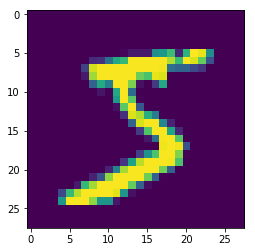

In [20]:
from matplotlib import pyplot
pyplot.imshow(x_train[0]/255)

In [21]:
x_train  = x_train.reshape(x_train.shape[0] , img_rows , img_cols , 1)
x_test = x_test.reshape(x_test.shape[0] , img_rows , img_cols , 1)
input_shape = (img_rows , img_cols , 1)

In [22]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [23]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [24]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [25]:
#A Basic Model
# Conv ->  MaxPool -> Fully Connected
# Mean Squared Error , SGD

def basic_model(num_filters = 10, 
                loss = keras.losses.mean_squared_error, 
                optimizer = keras.optimizers.SGD()):
    tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
    model_1 = Sequential()
    model_1.add(
        Conv2D(
            num_filters,
            kernel_size = (3,3),
            activation = 'relu',
            input_shape = input_shape
        )
    )

    model_1.add(MaxPooling2D(pool_size = (2,2)))
    model_1.add(Flatten())
    model_1.add(
        Dense(num_classes , activation = 'sigmoid')
    )

    model_1.compile(
        loss = loss,
        optimizer = keras.optimizers.SGD(),
        metrics = ['accuracy']
    )

    #Now we train this model
    model_1.fit(
        x_train , y_train,
        batch_size = batch_size,
        epochs = epochs,
        verbose = 1,
        validation_data = (x_test , y_test),
        callbacks=[tensorboard]
    )

    #Let us evaluate

    score = model_1.evaluate(x_test , y_test , verbose = 0)
    print("Test loss: " , score[0])
    print('Test accuracy:', score[1])
    return model_1

In [26]:
#Model 1
#Here we test with only 10 filters in our convolution layer
first_model = basic_model(num_filters= 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.1284 - acc: 0.1797 - val_loss: 0.0893 - val_acc: 0.2869
Epoch 2/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.0871 - acc: 0.3805 - val_loss: 0.0851 - val_acc: 0.4367
Epoch 3/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0833 - acc: 0.4475 - val_loss: 0.0812 - val_acc: 0.4699
Epoch 4/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.0791 - acc: 0.4835 - val_loss: 0.0765 - val_acc: 0.5197
Epoch 5/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0742 - acc: 0.5465 - val_loss: 0.0712 - val_acc: 0.5882
Epoch 6/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.0687 - acc: 0.6139 - val_loss: 0.0655 - val_acc: 0.6481
Epoch 7/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.0632 - acc: 0.6582 - val_loss: 0.0600 - val_acc

In [26]:
import numpy as np

first_model.layers[1].output_shape

(None, 13, 13, 10)

In [27]:
#Model 2
#Here we test with an increased number of filters n = 20

second_model = basic_model(num_filters= 20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 46us/step - loss: 0.1363 - acc: 0.1658 - val_loss: 0.0901 - val_acc: 0.2890
Epoch 2/12
60000/60000 [==============================] - 3s 48us/step - loss: 0.0883 - acc: 0.3440 - val_loss: 0.0870 - val_acc: 0.3837
Epoch 3/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.0861 - acc: 0.4053 - val_loss: 0.0849 - val_acc: 0.4420
Epoch 4/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0838 - acc: 0.4792 - val_loss: 0.0823 - val_acc: 0.5206
Epoch 5/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.0807 - acc: 0.5528 - val_loss: 0.0786 - val_acc: 0.5866
Epoch 6/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0765 - acc: 0.5949 - val_loss: 0.0736 - val_acc: 0.6189
Epoch 7/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0710 - acc: 0.6259 - val_loss: 0.0675 - val_acc

In [28]:
#Let's bump it further
#Number of filters = 30
third_model = basic_model(num_filters = 25)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.1207 - acc: 0.2547 - val_loss: 0.0887 - val_acc: 0.3627
Epoch 2/12
60000/60000 [==============================] - 3s 53us/step - loss: 0.0865 - acc: 0.3592 - val_loss: 0.0845 - val_acc: 0.3625
Epoch 3/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.0826 - acc: 0.3799 - val_loss: 0.0803 - val_acc: 0.4241
Epoch 4/12
60000/60000 [==============================] - 3s 53us/step - loss: 0.0781 - acc: 0.4675 - val_loss: 0.0754 - val_acc: 0.5271
Epoch 5/12
60000/60000 [==============================] - 3s 46us/step - loss: 0.0729 - acc: 0.5615 - val_loss: 0.0698 - val_acc: 0.6089
Epoch 6/12
60000/60000 [==============================] - 3s 53us/step - loss: 0.0672 - acc: 0.6275 - val_loss: 0.0637 - val_acc: 0.6635
Epoch 7/12
60000/60000 [==============================] - 3s 49us/step - loss: 0.0612 - acc: 0.6757 - val_loss: 0.0578 - val_acc

In [29]:
#Enough with changing the number of filters
# Loss function , Optimizer tuning

fourth_model = basic_model(
    loss = keras.losses.categorical_crossentropy,
    optimizer = keras.optimizers.Adadelta()
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 50us/step - loss: 1.6675 - acc: 0.5473 - val_loss: 0.5617 - val_acc: 0.8599
Epoch 2/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.4465 - acc: 0.8765 - val_loss: 0.3599 - val_acc: 0.8994
Epoch 3/12
60000/60000 [==============================] - 2s 39us/step - loss: 0.3599 - acc: 0.8965 - val_loss: 0.3205 - val_acc: 0.9103
Epoch 4/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.3333 - acc: 0.9043 - val_loss: 0.3045 - val_acc: 0.9138
Epoch 5/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.3187 - acc: 0.9083 - val_loss: 0.2957 - val_acc: 0.9151
Epoch 6/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.3096 - acc: 0.9102 - val_loss: 0.2909 - val_acc: 0.9182
Epoch 7/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.3026 - acc: 0.9123 - val_loss: 0.2795 - val_acc

In [30]:
#Now let us try modifying the architecture of our network

def a_better_model(num_filters = 32 ,
                  loss = keras.losses.categorical_crossentropy,
                  optimizer = keras.optimizers.Adadelta(),
                   dropout_1 = False,
                   dropout_2 = False
                  ):
    tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
    model_1 = Sequential()
    model_1.add(
        Conv2D(
            num_filters,
            kernel_size = (3,3),
            activation = 'relu',
            input_shape = input_shape
        )
    )
    
    #A new Convolution Layer
    model_1.add(
        Conv2D(
            64 , (3,3),
            activation = 'relu'
        )
    )

    model_1.add(MaxPooling2D(pool_size = (2,2)))
    
    if dropout_1:
        model_1.add(Dropout(0.25))
    
    model_1.add(Flatten())
    model_1.add(
        Dense(128 , activation = 'relu')
    )
    if dropout_2:
        model_1.add(Dropout(0.5))
    
    model_1.add(
        Dense(num_classes , activation = 'softmax')
    )

    model_1.compile(
        loss = loss,
        optimizer = optimizer,
        metrics = ['accuracy']
    )

    #Now we train this model
    model_1.fit(
        x_train , y_train,
        batch_size = batch_size,
        epochs = epochs,
        verbose = 1,
        validation_data = (x_test , y_test),
        callbacks=[tensorboard]
    )

    #Let us evaluate

    score = model_1.evaluate(x_test , y_test , verbose = 0)
    print("Test loss: " , score[0])
    print('Test accuracy:', score[1])
    return model_1

In [31]:
fifth_model = a_better_model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.1894 - acc: 0.9424 - val_loss: 0.0586 - val_acc: 0.9798
Epoch 2/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.0445 - acc: 0.9865 - val_loss: 0.0399 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.0270 - acc: 0.9917 - val_loss: 0.0390 - val_acc: 0.9878
Epoch 4/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0187 - acc: 0.9943 - val_loss: 0.0305 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0127 - acc: 0.9962 - val_loss: 0.0344 - val_acc: 0.9896
Epoch 6/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0084 - acc: 0.9975 - val_loss: 0.0314 - val_acc: 0.9917
Epoch 7/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0054 - acc: 0.9987 - val_loss: 0.0301 -

In [32]:
sixth_model = a_better_model(dropout_1 = True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.1954 - acc: 0.9402 - val_loss: 0.0555 - val_acc: 0.9819
Epoch 2/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0519 - acc: 0.9841 - val_loss: 0.0467 - val_acc: 0.9849
Epoch 3/12
60000/60000 [==============================] - 10s 172us/step - loss: 0.0330 - acc: 0.9899 - val_loss: 0.0317 - val_acc: 0.9894
Epoch 4/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0242 - acc: 0.9921 - val_loss: 0.0296 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0186 - acc: 0.9939 - val_loss: 0.0327 - val_acc: 0.9890
Epoch 6/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0137 - acc: 0.9954 - val_loss: 0.0427 - val_acc: 0.9880
Epoch 7/12
60000/60000 [==============================] - 10s 175us/step - loss: 0.0109 - acc: 0.9963 - val_loss: 0.

In [33]:
seventh_model = a_better_model(dropout_1= True , dropout_2 = True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.2691 - acc: 0.9179 - val_loss: 0.0576 - val_acc: 0.9802
Epoch 2/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.0897 - acc: 0.9736 - val_loss: 0.0441 - val_acc: 0.9845
Epoch 3/12
60000/60000 [==============================] - 10s 166us/step - loss: 0.0673 - acc: 0.9807 - val_loss: 0.0370 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 10s 172us/step - loss: 0.0555 - acc: 0.9830 - val_loss: 0.0333 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0477 - acc: 0.9855 - val_loss: 0.0287 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.0413 - acc: 0.9878 - val_loss: 0.0273 - val_acc: 0.9907
Epoch 7/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.0367 - acc: 0.9888 - val_loss: 0.

In [1]:
from keras.callbacks import TensorBoard

Using TensorFlow backend.
